In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

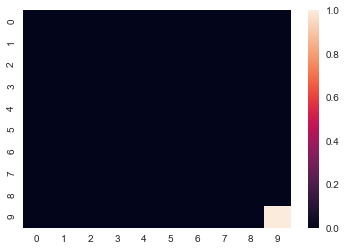

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [3]:
# Q1
reward_1 = np.zeros(shape=[10,10])
reward_1[9][9] = 1
# plt.pcolor(reward_1)
# plt.colorbar();
plt.clf()
ax = sns.heatmap(reward_1)
plt.show()
print(reward_1)

[[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0. -100. -100. -100.    0.    0.    0.]
 [   0.    0.    0.    0. -100.    0. -100.    0.    0.    0.]
 [   0.    0.    0.    0. -100.    0. -100. -100. -100.    0.]
 [   0.    0.    0.    0. -100.    0.    0.    0. -100.    0.]
 [   0.    0.    0.    0. -100.    0.    0.    0. -100.    0.]
 [   0.    0.    0.    0. -100.    0.    0.    0. -100.    0.]
 [   0.    0.    0.    0.    0.    0. -100. -100. -100.    0.]
 [   0.    0.    0.    0.    0.    0. -100.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.   10.]]


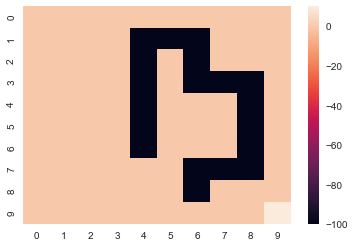

In [14]:
reward_2 = np.zeros(shape=[10,10])
reward_2[1, 4:7] = -100
reward_2[1:7, 4] = -100
reward_2[1:4, 6] = -100
reward_2[3, 6:9] = -100
reward_2[3:8, 8] = -100
reward_2[7, 6:9] = -100
reward_2[8, 6] = -100
reward_2[9,9] = 10
print(reward_2)
# plt.pcolor(reward_2)
# plt.colorbar();
plt.clf()
ax2 = sns.heatmap(reward_2)

plt.show()

In [15]:
# Q2

state_space = np.zeros(shape=[10,10])
state_space = [[10.0*i+j for i in range(0,10)] for j in range(0, 10)]
print(state_space)

[[0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0], [1.0, 11.0, 21.0, 31.0, 41.0, 51.0, 61.0, 71.0, 81.0, 91.0], [2.0, 12.0, 22.0, 32.0, 42.0, 52.0, 62.0, 72.0, 82.0, 92.0], [3.0, 13.0, 23.0, 33.0, 43.0, 53.0, 63.0, 73.0, 83.0, 93.0], [4.0, 14.0, 24.0, 34.0, 44.0, 54.0, 64.0, 74.0, 84.0, 94.0], [5.0, 15.0, 25.0, 35.0, 45.0, 55.0, 65.0, 75.0, 85.0, 95.0], [6.0, 16.0, 26.0, 36.0, 46.0, 56.0, 66.0, 76.0, 86.0, 96.0], [7.0, 17.0, 27.0, 37.0, 47.0, 57.0, 67.0, 77.0, 87.0, 97.0], [8.0, 18.0, 28.0, 38.0, 48.0, 58.0, 68.0, 78.0, 88.0, 98.0], [9.0, 19.0, 29.0, 39.0, 49.0, 59.0, 69.0, 79.0, 89.0, 99.0]]


In [16]:

action_set = [0, 1, 2, 3] # top, left, bottom, right
discount_factor = 0.8
reward = reward_1
w = 0.1

# Setting up transition probabilities
def transition_probability(curr_state, next_state, action):
    action_value = [-1, -10,1,10 ] # curr_state - next_state (based on state space)
    col = int(curr_state/10)
    row = int(curr_state%10)
    unallowed = [] # unallowed directions for a given state
    if row==0:
        unallowed.append(0) # top
    elif row==9:
        unallowed.append(2) # bottom
    if col==0:
        unallowed.append(1) # left
    elif col==9:
        unallowed.append(3) # right
    
    value = action_value[action]
    neighborhood = []
    for index in np.arange(0,4): # building neighborhood of the current state
        if index not in unallowed:
            neighborhood.append(curr_state + action_value[index])
    if unallowed: # not empty => edges or corners
        if len(unallowed)==2: # corners
            if action in unallowed: # action to move off the grid
                if next_state==curr_state: # => same_state
                    return 1-w+w/4+w/4
                elif next_state in neighborhood: # neighboring valid states
                    return w/4
            else: # action to stay in the grid
                if next_state==curr_state: # => same_state
                    return w/4+w/4
                elif next_state==curr_state+value and next_state in neighborhood: # intended state
                    return 1-w+w/4
                elif next_state in neighborhood: # neighboring valid states
                    return w/4      
        else: # edges
            if action in unallowed: # action to move off the grid
                if next_state==curr_state: # => same_state
                    return 1-w+w/4
                elif next_state in neighborhood: # neighboring valid states
                    return w/4
            else: # action to stay in the grid
                if next_state==curr_state: # => same_state
                    return w/4
                elif next_state==curr_state+value and next_state in neighborhood: # intended state
                    return 1-w+w/4
                elif next_state in neighborhood: # neighboring valid states
                    return w/4
            
    else: # non boundary
        if next_state==curr_state + value and next_state in neighborhood:
            return 1-w+w/4
        elif next_state in neighborhood:
            return w/4
    return 0


In [17]:
def construct_neighborhood(curr_state):
    col = int(curr_state/10)
    row = int(curr_state%10)
    action_value = [-1, -10, 1, 10] # curr_state - next_state (based on state space)
    unallowed = [] # unallowed directions for a given state
    if row==0:
        unallowed.append(0) # top
    elif row==9:
        unallowed.append(2) # bottom
    if col==0:
        unallowed.append(1) # left
    elif col==9:
        unallowed.append(3) # right
    
    neighborhood = []
    for index in np.arange(0,4): # building neighborhood of the current state
        if index not in unallowed:
            neighborhood.append(curr_state + action_value[index])
    return neighborhood

In [18]:
def value_iteration_value(reward, state_space, action_set, discount_factor):
    epsilon = 0.01
    V = np.zeros(shape=[10,10])
    delta = float("inf")
    flatten_state = []
    for element in state_space:
        for el in element:
            flatten_state.append(el)
            
    maximum = -1*float("inf")
    while delta > epsilon:
        delta = 0 
        temp=np.zeros([10,10])
        for curr_state in flatten_state:
            curr_col = int(curr_state/10)
            curr_row = int(curr_state%10)
            v = V[curr_row][curr_col]
            neighborhood = construct_neighborhood(curr_state)
            states_to_visit = neighborhood + [curr_state]
            maximum = -1*float("inf")
            for action in action_set:
                total = 0
                for next_state in states_to_visit:
                    p = transition_probability(curr_state, next_state, action)
                    next_col = int(next_state/10)
                    next_row = int(next_state%10)
                    total += p * (reward[next_row, next_col] + discount_factor * V[next_row][next_col])
#                     if curr_row==9 and curr_col==9:
#                         print next_state, next_row, next_col
#                         print action, next_state, p, reward[next_row, next_col], V[next_row][next_col] 
                if total>maximum:
                    maximum = total
            temp[curr_row][curr_col] = maximum
            delta = max(delta, np.abs(v - temp[curr_row][curr_col]))
        V=temp
            
#             if curr_row==9 and curr_col==9:
#                 print ("currrow, currcol, max: ", curr_row, curr_col, maximum)
#             print ("currrow, currcol, max: ", curr_row, curr_col, maximum)
            
    return V
                    
                

In [19]:
action_set = [0, 1, 2, 3] # top, left, bottom, right
discount_factor = 0.8
reward = reward_1
w = 0.1
V = value_iteration_value(reward, state_space, action_set, discount_factor)
print(V)

[[0.0442397  0.06457398 0.09118409 0.12504106 0.16807826 0.22269335
  0.29198796 0.37988042 0.49134892 0.61001145]
 [0.06457398 0.08833385 0.12185345 0.16476116 0.21945345 0.28917752
  0.37804302 0.49122817 0.63338372 0.78751905]
 [0.09118409 0.12185345 0.16458987 0.21930412 0.28906986 0.3779887
  0.49131731 0.63565109 0.81751608 1.01875794]
 [0.12504106 0.16476116 0.21930412 0.28906536 0.37798653 0.49132035
  0.63576137 0.81977022 1.05235181 1.31521922]
 [0.16807826 0.21945345 0.28906986 0.37798653 0.49132036 0.63576402
  0.81985582 1.05442573 1.35173221 1.69523349]
 [0.22269335 0.28917752 0.3779887  0.49132035 0.63576402 0.81985701
  1.05448231 1.35348475 1.73334073 2.18239181]
 [0.29198796 0.37804302 0.49131731 0.63576137 0.81985582 1.05448231
  1.3535115  1.73462151 2.21968743 2.80696303]
 [0.37988042 0.49122817 0.63565109 0.81977022 1.05442573 1.35348475
  1.73462151 2.22036214 2.83941767 3.60778693]
 [0.49134892 0.63338372 0.81751608 1.05235181 1.35173221 1.73334073
  2.21968743 

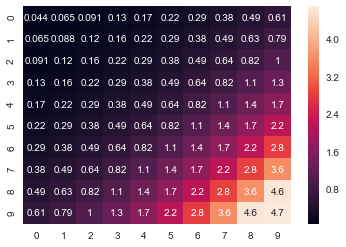

In [20]:
# Q3
# plt.pcolor(V)
# plt.colorbar();
plt.clf()
ax = sns.heatmap(V, annot=True)
plt.show()

In [21]:
def value_iteration_action(reward, state_space, action_set, discount_factor):
    epsilon = 0.01
    V = np.zeros(shape=[10,10])
    pi = np.zeros(shape=[10,10])
    delta = float("inf")
    flatten_state = []
    for element in state_space:
        for el in element:
            flatten_state.append(el)
            
    maximum = -1*float("inf")
    while delta > epsilon:
        delta = 0
        temp=np.zeros([10,10])
        for curr_state in flatten_state:
            curr_col = int(curr_state/10)
            curr_row = int(curr_state%10)
            v = V[curr_row][curr_col]
            neighborhood = construct_neighborhood(curr_state)
            states_to_visit = neighborhood + [curr_state]
            maximum = -1*float("inf")
            for action in action_set:
                total = 0
                for next_state in states_to_visit:
                    p = transition_probability(curr_state, next_state, action)
                    next_col = int(next_state/10)
                    next_row = int(next_state%10)
                    total += p * (reward[next_row, next_col] + discount_factor * V[next_row][next_col])
                if total>maximum:
                    maximum = total
            temp[curr_row][curr_col] = maximum
            delta = max(delta, np.abs(v - temp[curr_row][curr_col]))
        V=temp
    maximum = -1*float("inf")
    for curr_state in flatten_state:
        curr_col = int(curr_state/10)
        curr_row = int(curr_state%10)
        neighborhood = construct_neighborhood(curr_state)
        states_to_visit = neighborhood + [curr_state]
        maximum = -1*float("inf")
        for action in [0,1,3,2]: # or action set
            total = 0
            for next_state in states_to_visit:
                p = transition_probability(curr_state, next_state, action)
                next_col = int(next_state/10)
                next_row = int(next_state%10)
                total += p * ((reward[next_row, next_col]) + discount_factor * V[next_row][next_col])
            if total>maximum:
                maximum = total
                max_index = action
        pi[curr_row][curr_col] = max_index
    return [pi, V]

In [22]:
action_set = [0, 1, 2, 3] # top, left, bottom, right
discount_factor = 0.8
reward = reward_1
w = 0.1
[optimal_policy,V] = value_iteration_action(reward, state_space, action_set, discount_factor)
print(V)
print(optimal_policy)

[[0.0442397  0.06457398 0.09118409 0.12504106 0.16807826 0.22269335
  0.29198796 0.37988042 0.49134892 0.61001145]
 [0.06457398 0.08833385 0.12185345 0.16476116 0.21945345 0.28917752
  0.37804302 0.49122817 0.63338372 0.78751905]
 [0.09118409 0.12185345 0.16458987 0.21930412 0.28906986 0.3779887
  0.49131731 0.63565109 0.81751608 1.01875794]
 [0.12504106 0.16476116 0.21930412 0.28906536 0.37798653 0.49132035
  0.63576137 0.81977022 1.05235181 1.31521922]
 [0.16807826 0.21945345 0.28906986 0.37798653 0.49132036 0.63576402
  0.81985582 1.05442573 1.35173221 1.69523349]
 [0.22269335 0.28917752 0.3779887  0.49132035 0.63576402 0.81985701
  1.05448231 1.35348475 1.73334073 2.18239181]
 [0.29198796 0.37804302 0.49131731 0.63576137 0.81985582 1.05448231
  1.3535115  1.73462151 2.21968743 2.80696303]
 [0.37988042 0.49122817 0.63565109 0.81977022 1.05442573 1.35348475
  1.73462151 2.22036214 2.83941767 3.60778693]
 [0.49134892 0.63338372 0.81751608 1.05235181 1.35173221 1.73334073
  2.21968743 

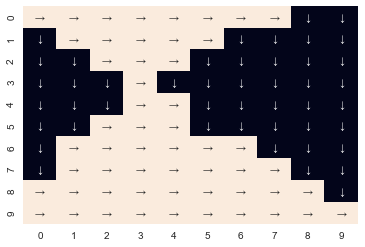

In [23]:
# -*- coding=utf-8 -*-
import sys
arrows = [u'\u2191', u'\u2190',u'\u2193',u'\u2192']
arrow_matrix = np.array(optimal_policy, dtype=object)
# print arrows
for i in range(0, 10):
    for j in range(0, 10):
        index = int(optimal_policy[i][j])
        arrow_matrix[i][j] = arrows[index]
plt.clf()
ax = sns.heatmap(optimal_policy, annot=arrow_matrix, fmt='',cbar=False)
plt.show()
# char_arr = [u'→',u'←',u'↓',u'→']

# for i in range(0, 10):
#     for j in range(0, 10):
#         index = int(optimal_policy[i][j])
#         # output_matrix[i][j] = char_arr[index]
#         if index==0:
#             print '↑ ',
#         elif index==1:
#             print '← ',
#         elif index==2:
#             print '↓ ',
#         else:
#             print '→ ',
#     print("\n")


[[ 6.46710402e-01  7.90798480e-01  8.20813046e-01  5.25100092e-01
  -2.38647637e+00 -4.23692968e+00 -1.92337440e+00  1.12809691e+00
   1.59116227e+00  2.03482701e+00]
 [ 8.27724228e-01  1.01773259e+00  1.06157960e+00 -1.87921677e+00
  -6.75466905e+00 -8.68371372e+00 -6.37348342e+00 -1.29836115e+00
   1.92477470e+00  2.60689337e+00]
 [ 1.06131226e+00  1.31300108e+00  1.44578824e+00 -1.63521080e+00
  -6.75775652e+00 -1.39166346e+01 -9.65320172e+00 -5.51481504e+00
  -1.34600438e-01  3.35547821e+00]
 [ 1.35778625e+00  1.68918212e+00  1.94390703e+00 -1.24321750e+00
  -6.33921636e+00 -7.98277134e+00 -7.94729165e+00 -9.43445243e+00
  -1.91815510e+00  4.38704487e+00]
 [ 1.73393379e+00  2.16807921e+00  2.58589509e+00 -7.36489716e-01
  -5.84672738e+00 -3.25840283e+00 -3.24107127e+00 -7.43449847e+00
   1.71515827e+00  9.15952421e+00]
 [ 2.21111919e+00  2.77755323e+00  3.41334536e+00 -3.81397000e-02
  -5.11411173e+00 -5.53379765e-01 -4.87536492e-01 -2.98351453e+00
   6.58269181e+00  1.53537569e+01

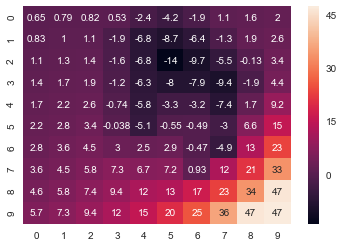

In [24]:
# Q6, Q7

action_set = [0, 1, 2, 3] # top, left, bottom, right
discount_factor = 0.8
reward = reward_2
w = 0.1
V = value_iteration_value(reward, state_space, action_set, discount_factor)
print(V) # action, next_state, p, reward[next_row, next_col], V[next_row][next_col] 
ax = sns.heatmap(V, annot=True)

[[2. 2. 2. 1. 1. 3. 3. 3. 3. 2.]
 [2. 2. 2. 1. 1. 0. 3. 3. 3. 2.]
 [2. 2. 2. 1. 1. 2. 3. 3. 3. 2.]
 [2. 2. 2. 1. 1. 2. 2. 0. 3. 2.]
 [2. 2. 2. 1. 1. 2. 2. 2. 3. 2.]
 [2. 2. 2. 1. 1. 2. 2. 1. 3. 2.]
 [2. 2. 2. 2. 2. 2. 1. 1. 3. 2.]
 [2. 2. 2. 2. 2. 2. 1. 2. 2. 2.]
 [3. 3. 3. 2. 2. 2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]]


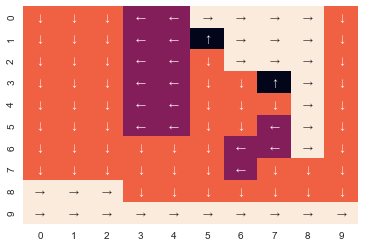

In [25]:
# Q9

action_set = [0, 1, 2, 3] # top, left, bottom, right
discount_factor = 0.8
reward = reward_2
w = 0.1
[optimal_policy,V] = value_iteration_action(reward, state_space, action_set, discount_factor)
print(optimal_policy)

for i in range(0, 10):
    for j in range(0, 10):
        index = int(optimal_policy[i][j])
        arrow_matrix[i][j] = arrows[index]
        
plt.clf()
ax = sns.heatmap(optimal_policy, annot=arrow_matrix, fmt='',cbar=False)
plt.show()

# -*- coding=utf-8 -*-
# output_matrix = strs = [["" for i in range(10)]for j in range(10)]
# for i in range(0, 10):
#     for j in range(0, 10):
#         index = int(optimal_policy[i][j])
#         if index==0:
#             print '↑ ',
#         elif index==1:
#             print '← ',
#         elif index==2:
#             print '↓ ',
#         else:
#             print '→ ',
#     print("\n")


Heat map of Optimal State Values for Reward Function 2


NameError: name 'max_reward' is not defined

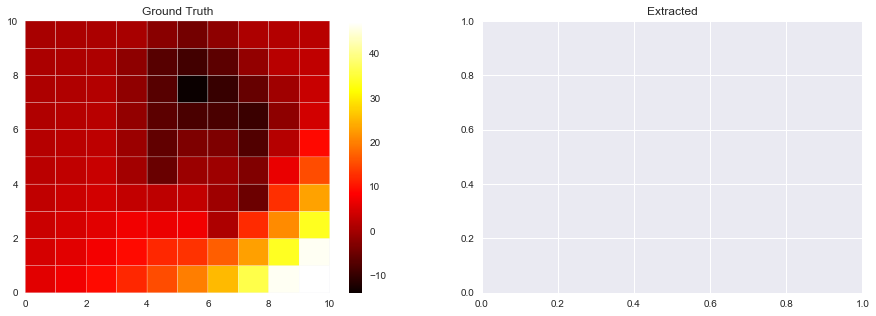

In [29]:
print("Heat map of Optimal State Values for Reward Function 2")

fig = plt.figure(figsize=(15, 5))
axes = fig.subplots(nrows=1, ncols=2)

plt.subplot(1,2,1)
plt.title("Ground Truth")
plt.pcolor(np.flipud(V), edgecolors = 'white', cmap = 'hot')
plt.colorbar()


plt.subplot(1,2,2)
plt.title("Extracted")
optimal_state_values_extracted_r2 = value_iteration_value(max_reward, state_space, action_set, discount_factor)
plt.pcolor(np.flipud(optimal_state_values_extracted_r2), edgecolors = 'white', cmap = 'hot')
plt.colorbar()
plt.show()